# 서울시 생활정보 기반 대중교통 수요 분석 프로젝트

---

## Step 4. 데이터 분석 - 구별 업종 등록 데이터

[기본 데이터]
* 1.4 business_type_202401.csv

[데이터 소개]
* 서울 시 구별 등록 업종 상위 10개 데이터(제공 가능한 최신 버전)
    * 택시 운송업 (개인택시 등록자 주거지)
    * 한식일반음식점업
    * 용달 화물자동차 운송업(개인용달 등록자 주거지)
    * 부동산 중개 및 대리업
    * 두발미용업
    * 커피전문점
    * 남녀용 겉옷 및 셔츠 도매업
    * 기타주점업
    * 일반 교과 학원
    * 한식 육류요리 전문점

[변수 소개]
* 다수 업종 상위 1~10

---

## Step 4.1.데이터 불러오

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### 데이터 로딩
* 'business_type_202401.csv'파일을 'seoul_business' 변수에 저장하고 그 데이터 확인
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [1]:
import pandas as pd

seoul_business = pd.read_csv('./1.4 business_type_202401.csv',sep=",", encoding = 'UTF-8')

In [2]:
# 데이터 프레임의 Shape을 확인
seoul_business.shape

(451, 22)

---

## 4.2. 기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### 기본 정보 확인하기
* 'seoul_business' 데이터의 정보를 확인
* 'describe', 'info', 'head' 등 전부 활용

In [3]:
# info()
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   자치구           451 non-null    object
 1   동             451 non-null    object
 2   다수업종 상위10     451 non-null    object
 3   다수업종 상위10.1   451 non-null    object
 4   다수업종 상위10.2   451 non-null    object
 5   다수업종 상위10.3   451 non-null    object
 6   다수업종 상위10.4   451 non-null    object
 7   다수업종 상위10.5   451 non-null    object
 8   다수업종 상위10.6   451 non-null    object
 9   다수업종 상위10.7   451 non-null    object
 10  다수업종 상위10.8   451 non-null    object
 11  다수업종 상위10.9   451 non-null    object
 12  다수업종 상위10.10  451 non-null    object
 13  다수업종 상위10.11  451 non-null    object
 14  다수업종 상위10.12  451 non-null    object
 15  다수업종 상위10.13  451 non-null    object
 16  다수업종 상위10.14  451 non-null    object
 17  다수업종 상위10.15  451 non-null    object
 18  다수업종 상위10.16  451 non-null    object
 19  다수업종 상위1

In [4]:
# describe()
seoul_business.describe()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
count,451,451,451,451,451,451,451,451,451,451,...,451,451,451,451,451,451,451,451,451,451
unique,27,425,226,280,176,305,177,180,142,205,...,131,239,69,147,127,189,113,222,107,230
top,송파구,소계,71,11,24,104,56,56,40,54,...,13,16,-,-,18,20,4,42,17,45
freq,28,25,7,7,11,6,8,9,11,9,...,18,8,82,82,14,10,15,10,16,9


In [5]:
# head()
seoul_business.head()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
0,자치구,동,택시운송업,택시운송업,한식 일반 음식점업,한식 일반 음식점업,용달 화물자동차 운송업,용달 화물자동차 운송업,부동산 중개 및 대리업,부동산 중개 및 대리업,...,커피전문점,커피전문점,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업,기타주점업,기타주점업,일반 교과 학원,일반 교과 학원,한식 육류요리 전문점,한식 육류요리 전문점
1,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
4,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220


In [6]:
# tail()
seoul_business.tail()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
446,강동구,성내3동,120,120,135,390,73,73,104,163,...,54,133,10,86,57,103,66,199,44,164
447,강동구,둔촌2동,117,436,63,249,89,89,61,108,...,34,85,10,788,21,39,35,90,24,101
448,강동구,암사1동,209,372,71,195,153,153,67,107,...,29,59,3,6,47,98,31,67,34,98
449,강동구,천호2동,157,187,152,509,144,151,97,188,...,63,212,4,17,95,268,24,42,69,245
450,강동구,길동,"1,441","1,557",152,436,217,225,146,237,...,71,228,6,126,122,294,39,136,70,224


In [7]:
seoul_business[seoul_business['자치구'] == '강동구'].head()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
433,강동구,소계,"3,295","4,980","1,101","3,388","1,528","1,566","1,188","1,990",...,546,"1,660",59,"1,433",589,"1,349",620,"2,104",428,"1,459"
434,강동구,강일동,183,543,20,85,121,124,29,48,...,12,63,1,3,1,2,37,109,6,19
435,강동구,상일동,99,99,41,112,95,95,62,110,...,15,38,-,-,14,30,14,34,20,52
436,강동구,명일1동,119,119,56,167,61,65,59,88,...,45,125,2,32,36,85,51,259,27,90
437,강동구,명일2동,2,2,27,120,11,11,37,60,...,22,100,4,10,4,11,159,610,13,45


#### 데이터 확인 및 처리

In [8]:
# header=1
seoul_business = pd.read_csv('./1.4 business_type_202401.csv', sep=",", encoding = "UTF-8", header=1)


In [9]:
# DataFrame 출력 시 모든 열을 표시하도록 설정
pd.set_option('display.max_columns',None)

In [10]:
# seoul_business.drop(0, axis=0, inplace=True)
# seoul_business.drop(1, axis=0, inplace=True)
# seoul_business.drop(2, axis=0, inplace=True)

In [11]:
# head()
seoul_business.head()

,자치구,동,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,두발미용업,두발미용업.1,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
0,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
1,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636","18,080","36,214","16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
2,종로구,소계,215,215,"1,548","5,912",618,646,549,889,261,480,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
3,종로구,사직동,7,7,230,982,12,12,57,96,28,66,124,525,2,18,74,177,9,34,45,220
4,종로구,삼청동,5,5,42,145,4,4,9,10,-,-,66,243,2,3,3,8,-,-,7,33


In [ ]:
# trg_cols = ['택시운송업', '한식 일반 음식점업',
#             '용달 화물자동차 운송업', '부동산 중개 및 대리업', '두발미용업',
#             '커피전문점', '남녀용 겉옷 및 셔츠 도매업',
#             '기타주점업', '일반 교과 학원', '한식 육류요리 전문점']
# seoul_business.replace('-', 0, inplace=True)
# seoul_business[trg_cols] = seoul_business[trg_cols].replace(',', '', regex=True).astype(int)

# seoul_business = seoul_business[trg_cols]

In [12]:
# 구별 등록 업종 중 버스정류장 설치에 중요한 업종 데이터만 불러오기
# 예 : 대중교통 이동수요가 높을 것으로 예상되는 업종, 종사자수가 많은 업종
seoul_business.iloc[1]

자치구                       합계
동                         합계
택시운송업                 47,176
택시운송업.1               76,701
한식 일반 음식점업            29,225
한식 일반 음식점업.1         100,183
용달 화물자동차 운송업          28,494
용달 화물자동차 운송업.1        29,356
부동산 중개 및 대리업          24,013
부동산 중개 및 대리업.1        42,636
두발미용업                 18,080
두발미용업.1               36,214
커피전문점                 16,255
커피전문점.1               57,322
남녀용 겉옷 및 셔츠 도매업       13,388
남녀용 겉옷 및 셔츠 도매업.1     51,116
기타주점업                 13,339
기타주점업.1               31,371
일반 교과 학원              11,911
일반 교과 학원.1            50,773
한식 육류요리 전문점           11,109
한식 육류요리 전문점.1         44,653
Name: 1, dtype: object

#### 분야를 합쳐서 살펴보기

* 구별 등록 업종 중 버스정류장 설치에 중요한 업종 데이터로는 택시운송업과 한식 일반 음식점업의 업종으로 보인다.

In [13]:
# '동' 열이 '소계'인 행만을 필터링 (구별 데이터만 필요함)
seoul_business.iloc[2]

자치구                    종로구
동                       소계
택시운송업                  215
택시운송업.1                215
한식 일반 음식점업           1,548
한식 일반 음식점업.1         5,912
용달 화물자동차 운송업           618
용달 화물자동차 운송업.1         646
부동산 중개 및 대리업           549
부동산 중개 및 대리업.1         889
두발미용업                  261
두발미용업.1                480
커피전문점                  948
커피전문점.1              3,613
남녀용 겉옷 및 셔츠 도매업        400
남녀용 겉옷 및 셔츠 도매업.1      962
기타주점업                  537
기타주점업.1              1,413
일반 교과 학원               110
일반 교과 학원.1             382
한식 육류요리 전문점            437
한식 육류요리 전문점.1        1,982
Name: 2, dtype: object

In [14]:
# '동' 열 제거
seoul_business.drop('동',axis=1,inplace=True)

In [15]:
# head()
seoul_business.head()

,자치구,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,두발미용업,두발미용업.1,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
0,자치구,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
1,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636","18,080","36,214","16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
2,종로구,215,215,"1,548","5,912",618,646,549,889,261,480,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
3,종로구,7,7,230,982,12,12,57,96,28,66,124,525,2,18,74,177,9,34,45,220
4,종로구,5,5,42,145,4,4,9,10,-,-,66,243,2,3,3,8,-,-,7,33


In [16]:
# 해당 데이터프레임을 csv 파일로 저장하세요.
seoul_business.to_csv('./seoul_business.csv',index=False)

---

## Step 4.3. 데이터 시각화
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [17]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

# For Mac OS
plt.rc('font', family='AppleGothic')
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# # For Windows
# plt.rc('font', family='Malgun Gothic')
# sns.set(font="Malgun Gothic", 
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')

#### 데이터 분포 알아보기

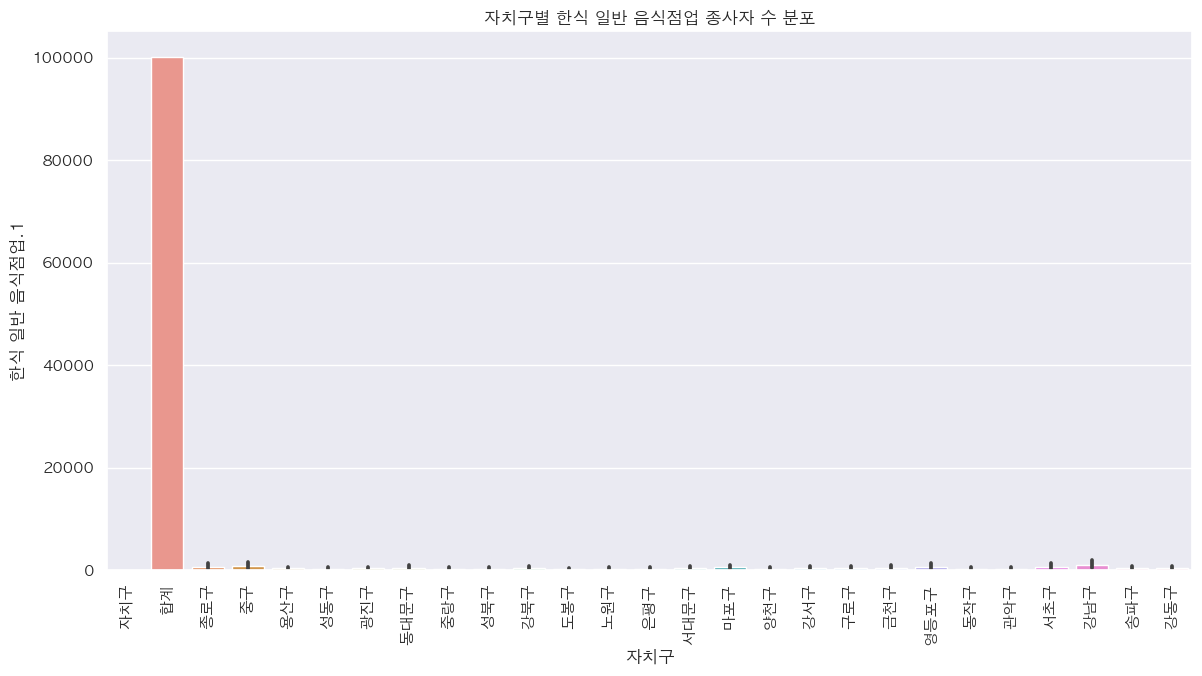

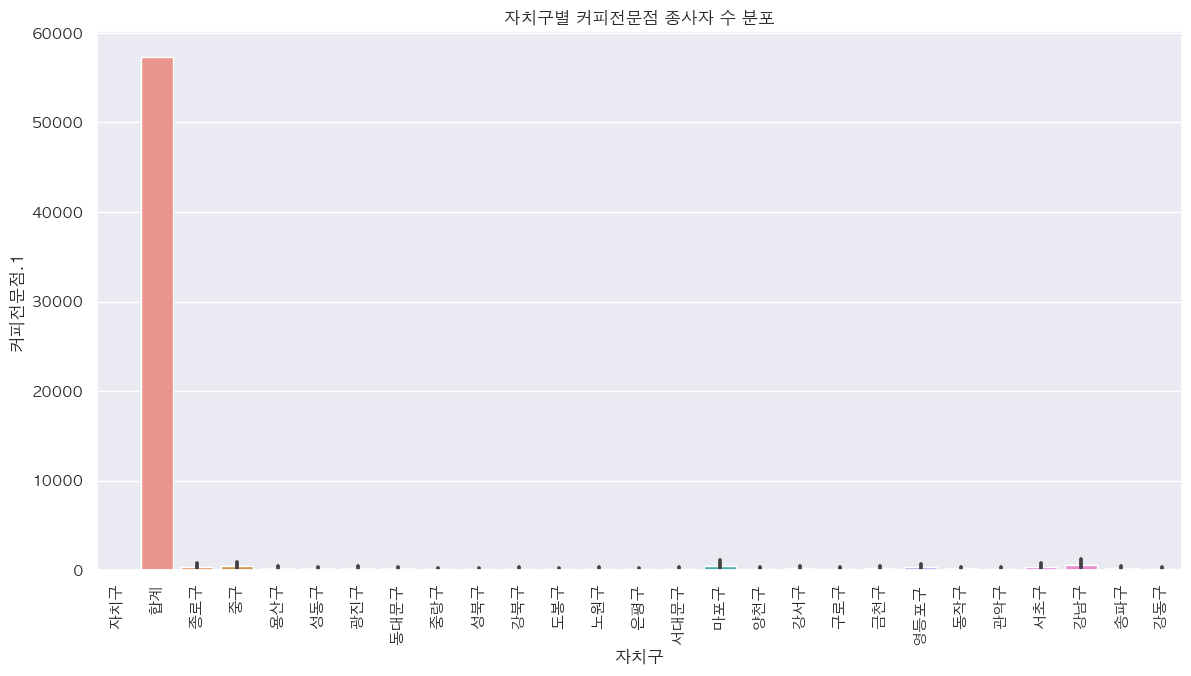

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '자치구'),
  Text(1, 0, '합계'),
  Text(2, 0, '종로구'),
  Text(3, 0, '중구'),
  Text(4, 0, '용산구'),
  Text(5, 0, '성동구'),
  Text(6, 0, '광진구'),
  Text(7, 0, '동대문구'),
  Text(8, 0, '중랑구'),
  Text(9, 0, '성북구'),
  Text(10, 0, '강북구'),
  Text(11, 0, '도봉구'),
  Text(12, 0, '노원구'),
  Text(13, 0, '은평구'),
  Text(14, 0, '서대문구'),
  Text(15, 0, '마포구'),
  Text(16, 0, '양천구'),
  Text(17, 0, '강서구'),
  Text(18, 0, '구로구'),
  Text(19, 0, '금천구'),
  Text(20, 0, '영등포구'),
  Text(21, 0, '동작구'),
  Text(22, 0, '관악구'),
  Text(23, 0, '서초구'),
  Text(24, 0, '강남구'),
  Text(25, 0, '송파구'),
  Text(26, 0, '강동구')])

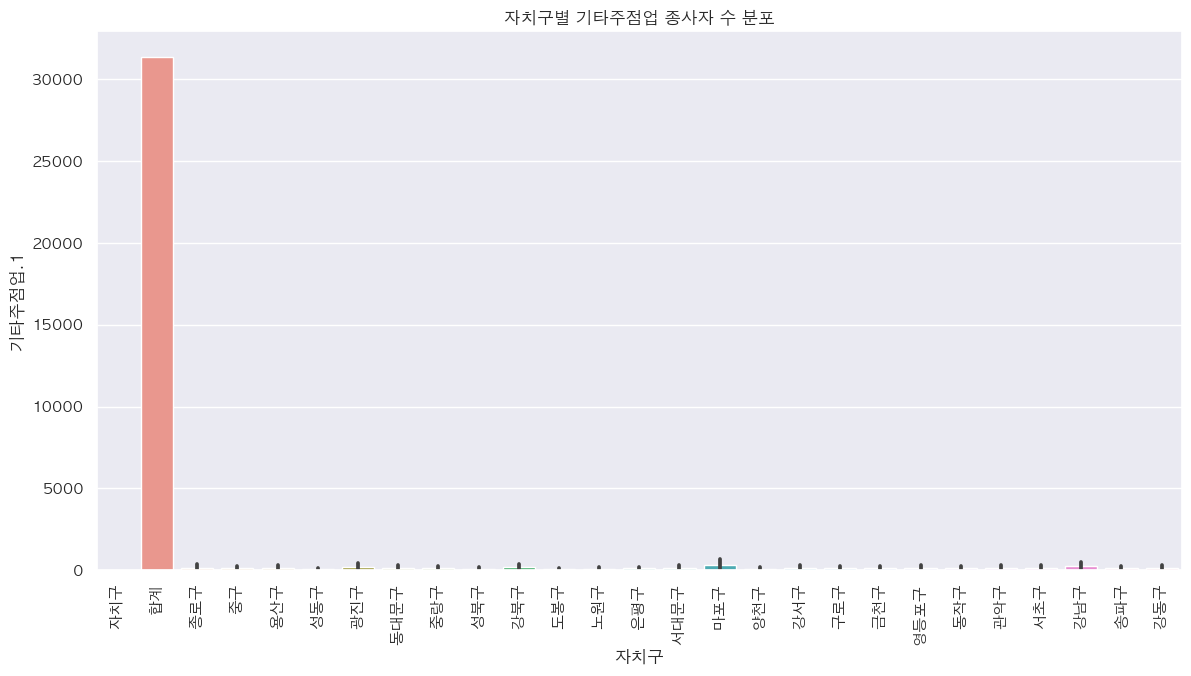

In [18]:
# 데이터 타입 확인 및 조건부 변환
for column in ['한식 일반 음식점업.1', '커피전문점.1', '기타주점업.1']:
    if seoul_business[column].dtype == 'object':
        seoul_business[column] = pd.to_numeric(seoul_business[column].str.replace(',', ''), errors='coerce')
        
# 자치구별 한식 일반 음식점업 종사자 수 분포
plt.figure(figsize=(14, 7))
sns.barplot(x='자치구', y='한식 일반 음식점업.1', data=seoul_business)
plt.title('자치구별 한식 일반 음식점업 종사자 수 분포')
plt.xticks(rotation=90)
plt.show()

# 자치구별 커피전문점 종사자 수 분포
plt.figure(figsize=(14, 7))
sns.barplot(x='자치구', y='커피전문점.1', data=seoul_business)
plt.title('자치구별 커피전문점 종사자 수 분포')
plt.xticks(rotation=90)
plt.show()

# 자치구별 기타주점업 종사자 수 분포
plt.figure(figsize=(14, 7))
sns.barplot(x='자치구', y='기타주점업.1', data=seoul_business)
plt.title('자치구별 기타주점업 종사자 수 분포')
plt.xticks(rotation=90)


### My Insight

- 자치구별 한식 일반 음식점업 종사자 수 분포 : 강남구가 제일 많고, 영등포구, 중구, 종로구 등 직장수요가 높은 자치구
- 자치구별 커피전문점 종사자 수 분포 : 강남구, 마포구 등 맛집이 많은 곳에 많이 분포함
- 자치구별 기타주점업 종사자 수 분포 : 기타주점업도 커피전문점이 많은 곳에 대체적으로 분포함